In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
'''
	* create train by selecting index of X and converting to numpy array
	* fit the linear regression
'''
def regress(X, y, regr, transform):
	transform(X)

	regr.fit(X, y)
	y_pred = regr.predict(X)
	print("Mean squared error on train: ", mean_squared_error(y, y_pred))
	print("Training R2: ", r2_score(y, y_pred))


'''
	* convert subarrays of shape (5,5) into single arrays that contain 25 entries
'''
def concatenated_elements(X):
	# remove days 6-10 from training
	for i in range(len(X)):
		try:
			X[i] = np.concatenate(X[i])
		except:
			print(X[i])
'''
	* graph the averages of high/low/open/close of the five 
	* days vs the slope from days 6-10
'''
def graph(X, y):
	X_labels = []
	for i in range(len(X)):
		X_labels.append(np.mean(X[i]))
	
	# print(X_labels)
	plot = sns.scatterplot(X_labels, y, hue=y)
	plot.set(title= 'average of 5 days vs slope', 
			 xlabel= ('average of high/low/open/close across 5 days'), 
			 ylabel= 'slope of change')
'''
	* split data into 10 day cylcles,
	* find slope of days 6-10,
	* drop days 6-10 so training data includes only
	* "historical data"
'''
def label_data(X):		
	# create y label vector.
	# after reading the dataframe in, convert to groups of 10 days
	y = np.zeros((X.shape[0] // 10))
	X = np.array_split(X, X.shape[0] / 10)

	# label the 10 day groups based on days 6-10(day 10 close - day 6 open)
	for i in range(len(X)):
		stock_open = X[i].Open.to_numpy()
		stock_close = X[i].Close.to_numpy()
		y[i] = round(stock_close[9] - stock_open[5], 2)
	
	# remove days 6-10 from training
	for i in range(len(X)):
		X[i] = X[i][:5].to_numpy()
	
	return X, y



In [132]:
# read in dataframe and reduce to 'Open', 'High', 'Low', 'Close', and 'Volume'
X = pd.read_csv("TWTR.csv")
X = X[['Open', 'High', 'Low', 'Close']]

# create y label vector
X, y = label_data(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Mean squared error on train:  7.825454223551709
Training R2:  0.13328678960986107
Mean squared error on train:  4.550996061039732
Training R2:  0.41147652448449445


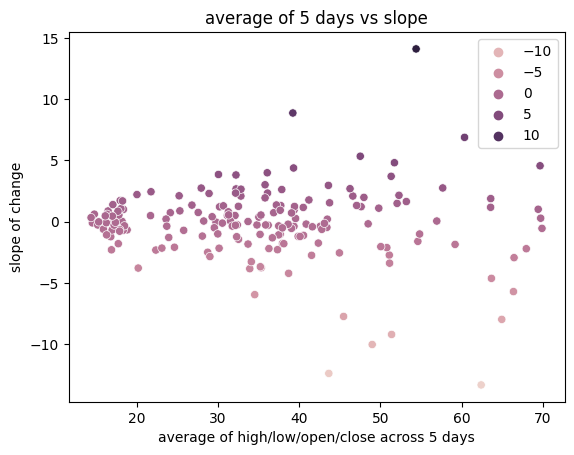

In [133]:
regr = linear_model.LinearRegression()

graph(X_train, y_train)

regress(X_train, y_train, regr, transform= concatenated_elements)
regress(X_test, y_test, regr, transform=concatenated_elements)